<a href="https://colab.research.google.com/github/Saikat-Mandal/Classification-ML/blob/main/Project_3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris flower classification

The Iris flower data set is a multivariate data set. The data quantifies into three different species.The data set consists of 150 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data dictionary

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


There are no null values here so that's good. Lets now see the type of flowers.

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


They are present equally. Lets vizualise them.

In [ ]:
df['species'].plot(kind='bar')

TypeError: no numeric data to plot

Oh! The type here is object. we will convert into numeric later. Lets vizulize it in a pie chart.

In [ ]:
x =[50,50,50]
l = ['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica']

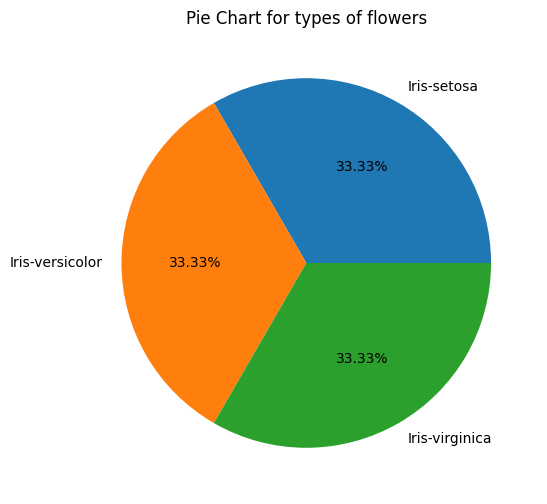

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
ax.pie(x, labels = l, autopct='%1.2f%%')
ax.set(
    title = "Pie Chart for types of flowers",
);

# Lets check for any outliers

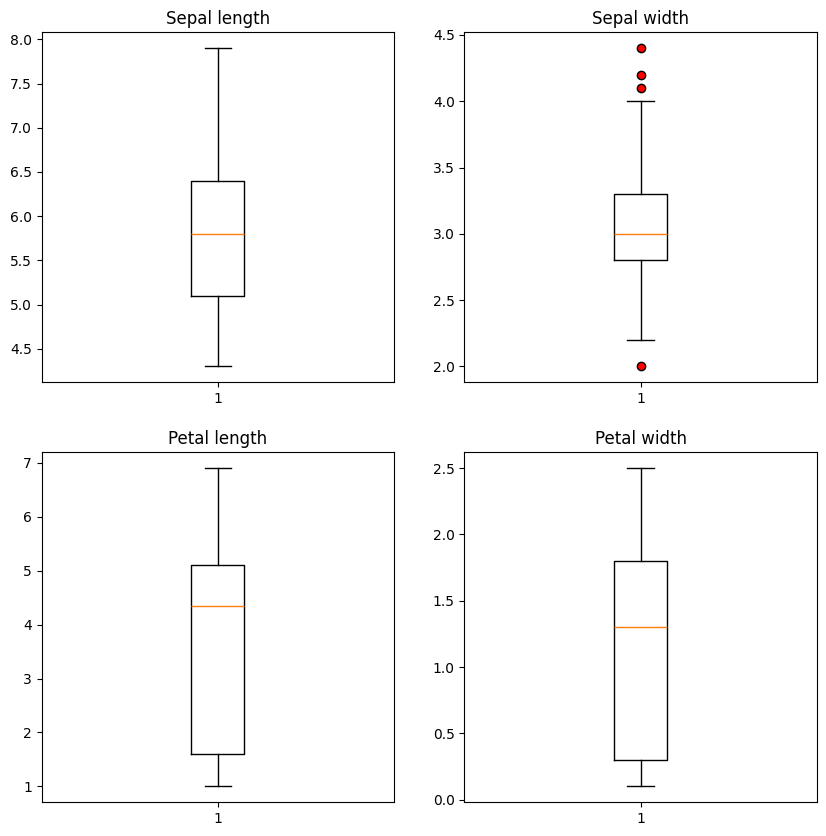

In [ ]:
fig , ((ax0,ax1) , (ax2,ax3)) = plt.subplots(nrows=2 , ncols=2, figsize=(10,10))


ax0.boxplot(df['sepal_length'], flierprops={'markerfacecolor': 'red'})
ax0.set(
    title="Sepal length"
)

ax1.boxplot(df['sepal_width'], flierprops={'markerfacecolor': 'red'})
ax1.set(
    title="Sepal width"
)

ax2.boxplot(df['petal_length'], flierprops={'markerfacecolor': 'red'})
ax2.set(
    title="Petal length"
)

ax3.boxplot(df['petal_width'], flierprops={'markerfacecolor': 'red'});
ax3.set(
    title="Petal width"
);

Sepal width has some outliers

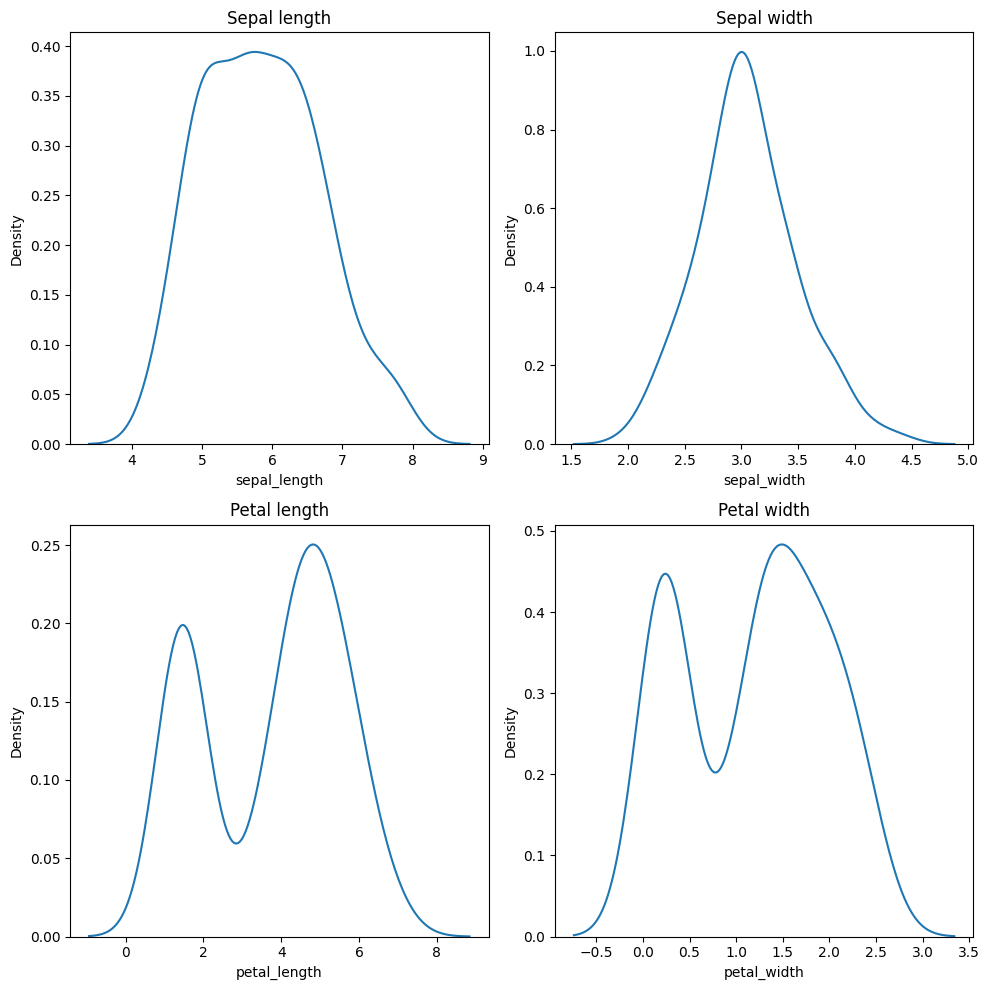

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.kdeplot(df['sepal_length'], ax=ax0)
ax0.set(title="Sepal length")

sns.kdeplot(df['sepal_width'], ax=ax1)
ax1.set(title="Sepal width")

sns.kdeplot(df['petal_length'], ax=ax2)
ax2.set(title="Petal length")

sns.kdeplot(df['petal_width'], ax=ax3)
ax3.set(title="Petal width")

plt.tight_layout()



Lets see some scatter plots

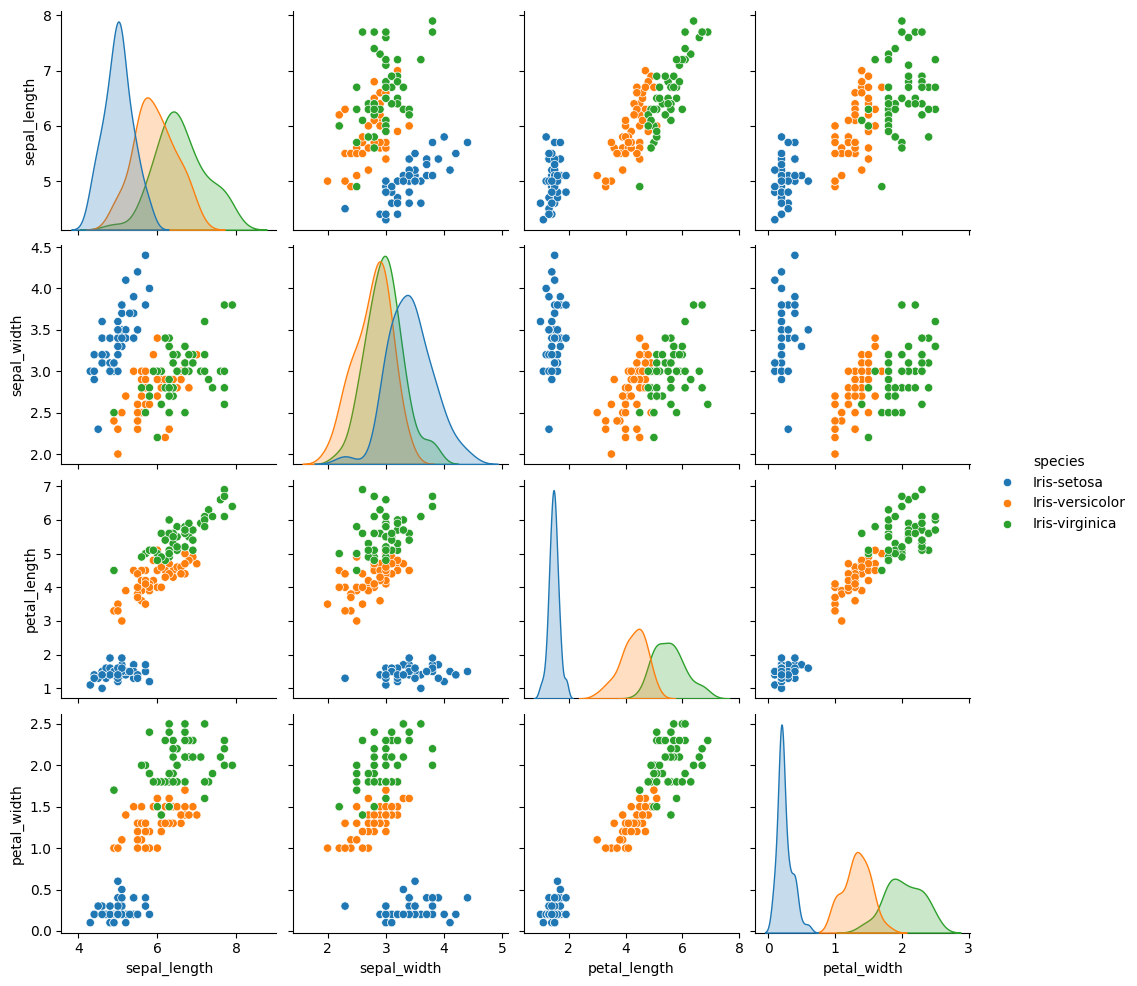

In [ ]:
sns.pairplot(df, hue='species');

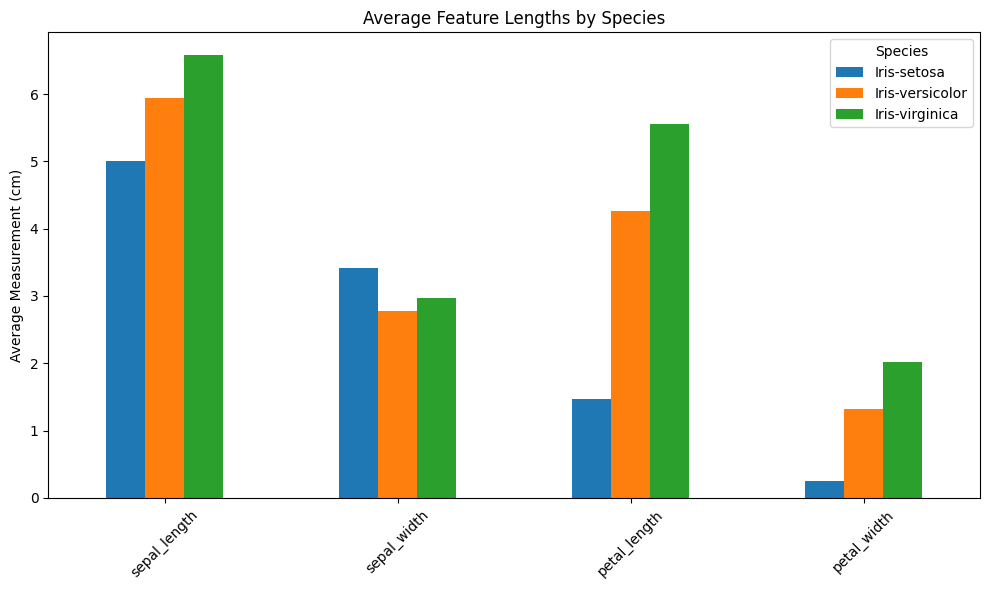

In [ ]:
mean_df = df.groupby('species').mean(numeric_only=True)

# Transpose so features go on x-axis
mean_df_T = mean_df.T

# Plot
mean_df_T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Average Measurement (cm)")
plt.title("Average Feature Lengths by Species")
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.tight_layout()
plt.show()

As we can see that iris-setosa is well separated  from the other two
and iris-virginica is the longest flower

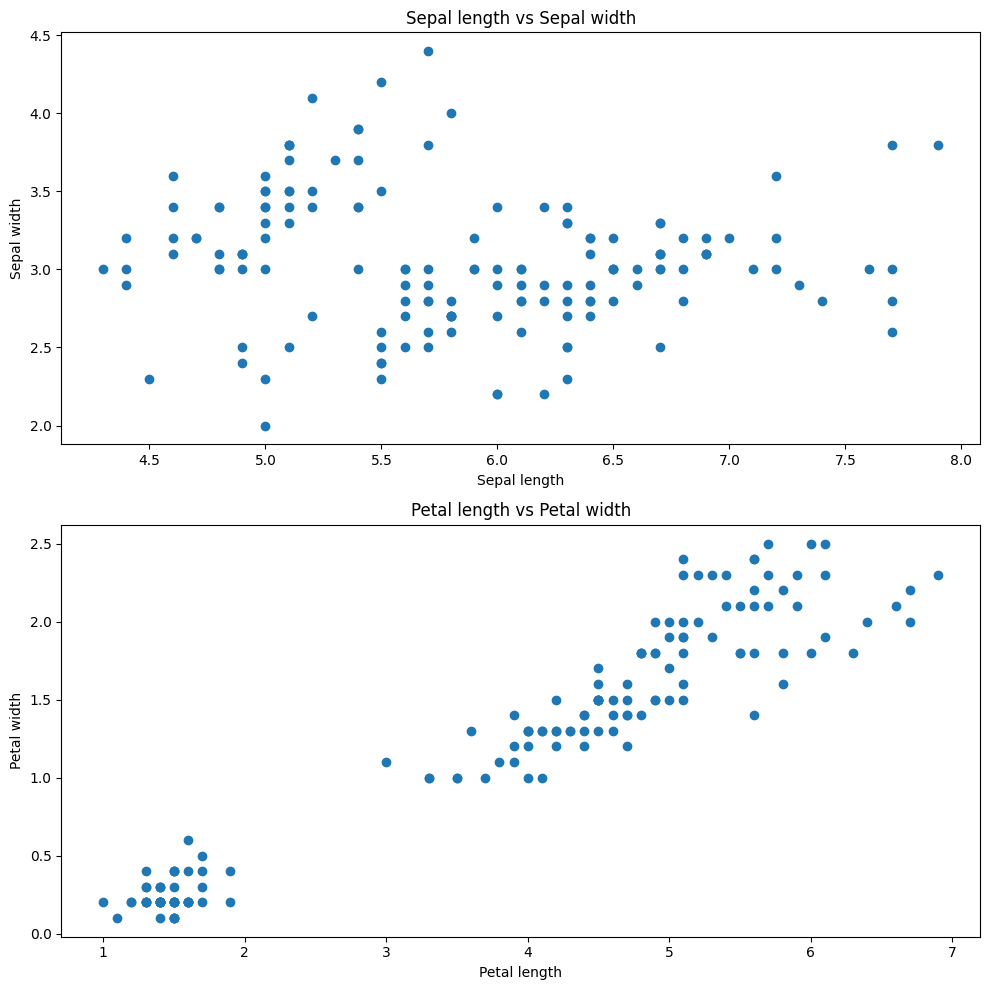

In [ ]:
fig , (ax0 , ax1) = plt.subplots(nrows=2 , ncols=1, figsize=(10,10))

ax0.scatter(df['sepal_length'] , df['sepal_width'] )
ax0.set(
    title="Sepal length vs Sepal width",
    xlabel="Sepal length",
    ylabel="Sepal width"
)

ax1.scatter(df['petal_length'] , df['petal_width'] )
ax1.set(
    title="Petal length vs Petal width",
    xlabel="Petal length",
    ylabel="Petal width"
)
plt.tight_layout()

Now lets encode the categorical variable for machine learning

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['species'] = encoder.fit_transform(df['species'])


it mapped the column into ['setosa', 'versicolor', 'virginica'] → [0, 1, 2]

Let's now split into X , y and then train and test sets

In [ ]:
X = df.drop('species' , axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

Lets start machine learning !

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def train_and_score(models):
  scores = {}

  for model_name , model in models.items():
    model.fit(X_train , y_train)
    scores[model_name] = model.score(X_test , y_test)

  return scores


In [ ]:
 models = {
     "Logsitic regression" : LogisticRegression(),
     "Decision tree" : DecisionTreeClassifier(),
     "Random forest" : RandomForestClassifier(),
     "Naive bayes" : GaussianNB(),
     "SVM" : SVC(),
     "KNN" : KNeighborsClassifier()
 }

 scores = train_and_score(models)

In [ ]:
scores

{'Logsitic regression': 0.9333333333333333,
 'Decision tree': 0.9,
 'Random forest': 0.9333333333333333,
 'Naive bayes': 0.9666666666666667,
 'SVM': 0.9333333333333333,
 'KNN': 0.9333333333333333}

We see the max score on Naive bayes followed by others

-lets predict for the above models

In [ ]:
lr_preds = models['Logsitic regression'].predict(X_test)
dt_preds = models['Decision tree'].predict(X_test)
rf_preds = models['Random forest'].predict(X_test)
nb_preds = models['Naive bayes'].predict(X_test)
svm_preds = models['SVM'].predict(X_test)
knn_preds = models['KNN'].predict(X_test)

# Lets evaluate the models

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

Logistic regression

In [ ]:
print("Logistic Regression:\n")
print("Classification report\n\n" ,classification_report(y_test, lr_preds) )
print("Accuracy" ,accuracy_score(y_test, lr_preds) )

Logistic Regression:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy 0.9333333333333333


Decision tree

In [ ]:
print("Decision tree:\n")
print("Classification report\n\n" ,classification_report(y_test, dt_preds) )
print("Accuracy" ,accuracy_score(y_test, dt_preds) )

Decision tree:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.90      0.86        10
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

Accuracy 0.9


Random forest

In [ ]:
print("Random forest:\n")
print("Classification report\n\n" ,classification_report(y_test, rf_preds) )
print("Accuracy" ,accuracy_score(y_test, rf_preds) )

Random forest:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy 0.9333333333333333


Naive bayes

In [ ]:
print("Naive bayes:\n")
print("Classification report\n\n" ,classification_report(y_test, nb_preds) )
print("Accuracy" ,accuracy_score(y_test, nb_preds) )

Naive bayes:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy 0.9666666666666667


SVM

In [ ]:
print("SVM:\n")
print("Classification report\n\n" ,classification_report(y_test, svm_preds) )
print("Accuracy" ,accuracy_score(y_test, svm_preds))

SVM:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy 0.9333333333333333


KNN

In [ ]:
print("KNN:\n")
print("Classification report\n\n" ,classification_report(y_test, knn_preds) )
print("Accuracy" ,accuracy_score(y_test, knn_preds))

KNN:

Classification report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Accuracy 0.9333333333333333


lets vizualize the accuracies

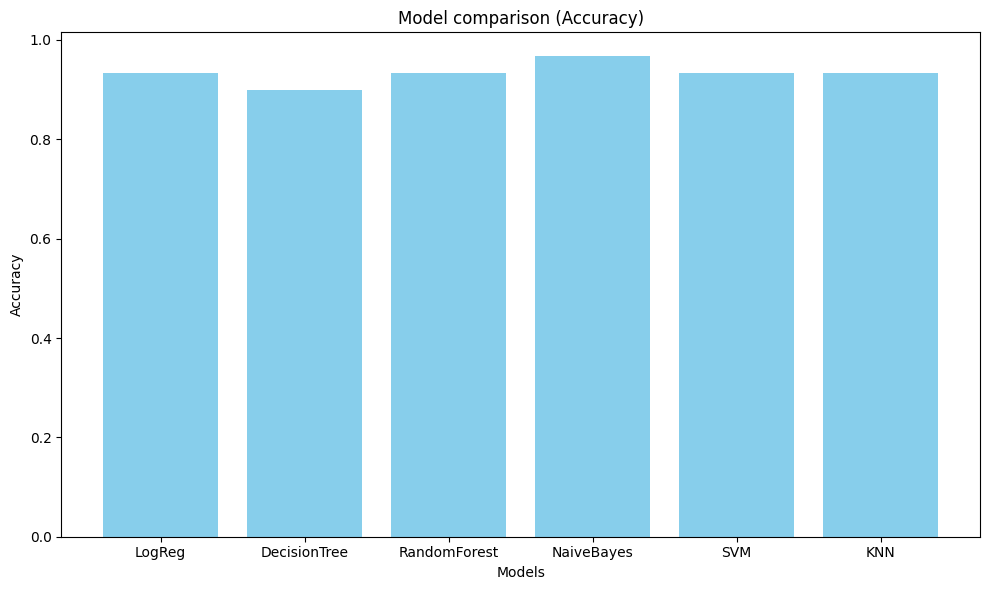

In [ ]:
models = ['LogReg', 'DecisionTree', 'RandomForest', 'NaiveBayes', 'SVM', 'KNN']
accuracies = [0.933, 0.90, 0.933, 0.967, 0.933, 0.933]

fig , ax = plt.subplots(figsize=(10,6))

ax.bar(models, accuracies, color='skyblue')
ax.set(
    title="Model comparison (Accuracy)",
    xlabel="Models",
    ylabel="Accuracy"
);
plt.tight_layout()

# As we can see , Naive bayes performed the best here
we can further try tuning the model and deploy it on web.